# **PRAKTIKUM DAMIN MODUL 4**
Nama : Annisa Novantika\
NIM : 121450005\
Kelas : RC

# **Tugas Individu**
Diantara Dataset 1-5 yang ada, pilih minimal 3 dataset. Kemudian lakukan
klasterisasi K-Means menggunakan code python yang ada pada modul ini. Analisis
data dengan hasil yang anda dapatkan !. Buat laporan dalam file PDF yang berisi:\
a) deskripsi data yang anda pilih,\
b) flowchart praktikum,\
c) hasil dan analisis hasil

---



# **Klastering Pada Dataset Instagram visits clustering.csv**

---



## **Deskripsi Data**
Data yang saya gunakan adalah Instagram visits clustering.csv. Data ini terdiri dari tiga kolom, yaitu :
- User ID : Nomor identifikasi unik pada setiap pengguna instagram
- Instagram visit score : nilai yang menunjukan seberapa sering seseorang mengunjungi instagram
- Spending_rank(0 to 100) : Nilai atau peringkat dari 0 hingga 100 yang mungkin menunjukkan seberapa banyak pengguna tersebut menghabiskan uang atau melakukan pembelian di platform Instagram


### 1. Data Loading

In [1]:
import pandas as pd
df_insta = pd.read_csv(("/content/Instagram visits clustering.csv"), index_col="User ID")
df_insta.head(3)

,Instagram visit score,Spending_rank(0 to 100)
User ID,,
0,63,24.050708
1,61,25.223290
2,104,18.528245


Kode di atas menggunakan pustaka pandas dalam bahasa pemrograman Python untuk membaca sebuah file CSV yang berisi data pengguna Instagram. Fungsi pd.read_csv() dari pustaka pandas digunakan untuk membaca file CSV yang terletak di lokasi tertentu ("/content/Instagram visits clustering.csv") dan kemudian memuatnya ke dalam sebuah DataFrame yang disimpan dalam variabel df_insta. Pada saat membaca file CSV, kolom "User ID" dipilih sebagai indeks (index_col="User ID"), yang berarti kolom ini akan digunakan sebagai indeks untuk setiap baris dalam DataFrame. Fungsi head(3) digunakan untuk menampilkan tiga baris pertama dari DataFrame tersebut untuk memberikan gambaran awal mengenai struktur dan konten data yang telah dibaca.

### 2. Visualization

<ipython-input-2-289b7cd003d4>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


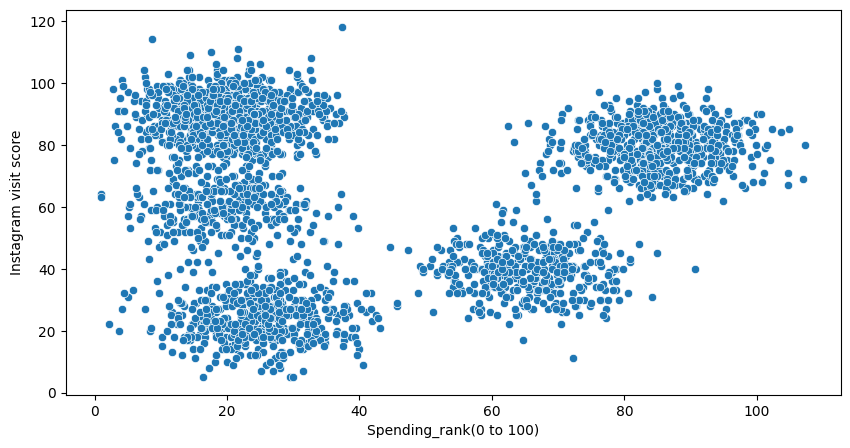

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize = (10,5))
sns.scatterplot(
    data=df_insta,
    x="Spending_rank(0 to 100)",
    y="Instagram visit score",
    palette="Set2"
);

Kode diatas menggunakan matplotlib dan seaborn untuk membuat plot. Plot tersebut menampilkan titik-titik dimana setiap titik mewakii pengguna instagram. Scatter plot tersebut menggambarkan hubungan variabel  "Spending_rank(0 to 100)" di sumbu X dan "Instagram visit score" di sumbu Y. Dapat dilihat pada plot peringkat pengeluaran dan tingkat seringnya mengunjungi instagram menyebar dan terlihat seperti membentuk beberapa kelompok pada nilai uang yang dikeluarkan pengguna antara 0-40 dan 60-80.

### 3. Normalizing

Sebelum menerapkan algoritme clustering, dilakukan normalisasi data. Normalisasi terhadap data yang tersimpan dalam DataFrame df_insta menggunakan pustaka Scikit-learn  . Normalisasi dilakukan untuk menormalkan data guna menghilangkan outlier atau anomali apa pun.

In [3]:
from sklearn import preprocessing

X = df_insta
X_norm = preprocessing.normalize(X)

### 4. Elbow Method
Setelah normalisasi dilakukan pencarian nilai K optimal.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

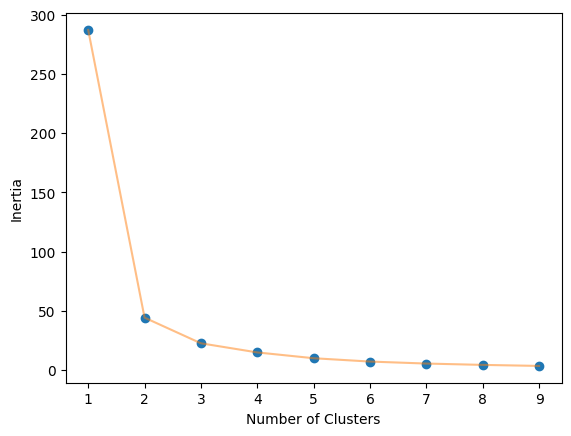

In [4]:
import numpy as np
from sklearn.cluster import KMeans

def elbow_plot(data,clusters):
  inertia = []
  for n in range(1, clusters):
    algorithm = KMeans(
        n_clusters = n,
        init = "k-means++",
        random_state=125,
    )
    algorithm.fit(data)
    inertia.append(algorithm.inertia_)
  #plot
  plt.plot(np.arange(1, clusters), inertia, 'o')
  plt.plot(np.arange(1, clusters), inertia, '-', alpha =0.5)
  plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
  plt.show();
elbow_plot(X_norm,10)

Plot menunjukkan perubahan nilai inertia seiring dengan peningkatan jumlah cluster yang diuji. Dari plot hasil menunjukan dengan penggunaan metode elbow diperoleh nilai K-
optimal yaitu 3.

### 5. K-Means Clustering

In [5]:
algorithm = KMeans(n_clusters = 3, init="k-means++", random_state=125)
algorithm.fit(X_norm)
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


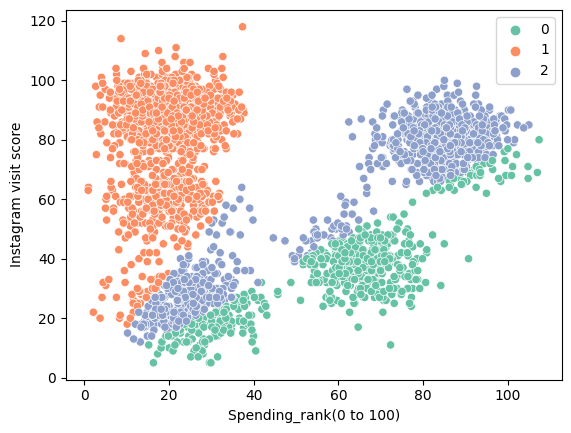

In [6]:
sns.scatterplot(data = X, x = "Spending_rank(0 to 100)", y="Instagram visit score", hue = labels, palette="Set2");


Analisis hasil K-Means : \
"0" : Dari peringkat pengeluaran tinggi dengan tingkat keseringan mengunjungi instagram rendah\
"1" : Dari peringkat pengeluaran rendah dengan tingkat keseringan mengunjungi instagram tinggi \
"2" : Peringkat pengeluaran rata-rata hingga tinggi dengan tingkat keseringan mengunjungi instagram menengah hingga tinggi.

### 6. Using different features

Tidak digunakan karena fitur hanya ada 3, 1 sebagai indeks dan 2 fitur sudah dilakukan clustering. Sehingga tidak ada fitur lagi yang dapat digunakan.



## **Flowchart**
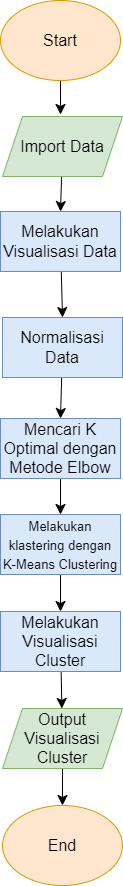

# **Klastering Pada Dataset bike-sharing.csv**

---






## **Deskripsi Data**
Data yang saya gunakan yang kedua adalah  bike-sharing.csv. Dataset tersebut terdiri dari beberapa atribut, yaitu :
- instant: Nomor baris atau indeks data.
- dteday: Tanggal peminjaman sepeda.
- season: Musim dalam angka saat peminjaman terjadi  (1 untuk musim semi, 2 untuk musim panas, 3 untuk musim gugur, 4 untuk musim dingin).
- yr: Tahun peminjaman sepeda (0 untuk tahun 2011, 1 untuk tahun 2012).
- mnth: Bulan peminjaman sepeda (1 hingga 12 untuk Januari hingga Desember).
- hr: Jam peminjaman sepeda(dalam format 0 hingga 23).
- holiday: Indikator apakah hari itu merupakan hari libur (1 untuk hari libur, 0 untuk bukan hari libur).
weekday: Hari dalam dalam seminggu saat peminjaman sepeda (0 untuk Minggu, 1 untuk Senin, dst hingga 6 untuk Sabtu).
- workingday: Indikator apakah hari itu merupakan hari kerja (1 untuk hari kerja, 0 untuk hari libur atau akhir pekan).
- weathersit: Kondisi cuaca saat peminjaman sepeda (1: cerah, 2: berkabutberawan, 3: hujan ringan/salju, 4: hujansalju intens).
- temp: Suhu dalam derajat Celsius saat peminjaman sepeda.
- atemp: Suhu perasa (disebut juga sebagai 'feels like' temperature) dalam derajat Celsius.
- hum: Kelembaban relatif saat peminjaman sepeda.
- windspeed: Kecepatan angin saat peminjaman sepeda.
- casual: Jumlah peminjam sepeda tanpa keanggotaan tetap.
- registered: Jumlah peminjam sepeda dengan keanggotaan tetap.
- cnt: Jumlah total peminjam sepeda (casual + registered).

## 1. Data Loading
Ha pertama yang harus kita lakukan adalah muat file bike-sharing.csv menggunakan pandas dan menjadikan "instan" sebagai indeks.

In [7]:
# Impor library Pandas dengan alias pd
import pandas as pd

# Baca file CSV ke dalam DataFrame dan beri nama df_bike
df_bike = pd.read_csv("bike-sharing.csv", index_col="instant")

# Tampilkan lima baris pertama dari DataFrame
df_bike.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 2. Visualization
Lalu, kita lakukan visualisasi dengan menggunakan scatter plot dari seaborn.

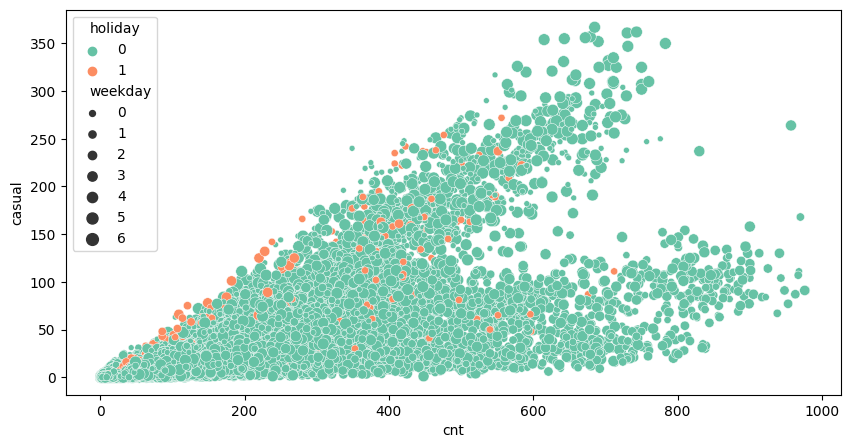

In [8]:
#import library untuk melakukan visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#membuat scatter plot
plt.figure(1, figsize = (10, 5))
sns.scatterplot(
    data = df_bike,
    x="cnt",
    y="casual",
    hue = "holiday",
    size="weekday",
    palette="Set2"
);

Scatter plot diatas menampilkan titik-titik dimana setiap titik mewakii jumlah peminjaman sepeda. Scatter plot tersebut menggambarkan hubungan variabel "cnt" yaitu jumlah total peminjaman sepeda di sumbu X dan "casuale" yaitu jumlah peminjaman sepeda tanpa keanggotaan tetap di sumbu Y. Pada plot juga variabel "holiday" memberikan warna yang berbeda pada titik - titik scatter plot berdasarkan status hari libur atau bukan(hijau untuk libur dan orange untuk
 bukan hari libur). Untuk membedakan ukuran titik-titik scatter plot berdasarkan hari dalam seminggu (variabel weekday). \
 Dapat dilihat pada plot jumlah total peminjaman sepeda dan peminjaman sepeda tanpa keanggotaan tetap tersebar sangat banyak dan terlihat seperti bertumpuk. untuk menemukan lebih banyak kluster akan dilakukan menggunakan algoritma clustering selanjutnya.

### 3. Normalizing
Selanjutnya akan dilakukan normalisasi untuk menghilangkan outlier atau anomali apa pun. Misal kita menghapus kolom “dteday” dan “windspeed” dan akan menggunakan kolom lainnya untuk menemukan
cluster.

In [9]:
#import modul preprocessing dari scikit-learn
from sklearn import preprocessing

#menghapus kolom yang ditentukan
x = df_bike.drop(['dteday','windspeed'], axis=1)

#menormalisaikan data yang tersisa
x_norm = preprocessing.normalize(x)

### 4. Elbow Method
Untuk menemukan kluster, dilakukan pencarian niai K optimal pada K-Means menggunakan metode elbow.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

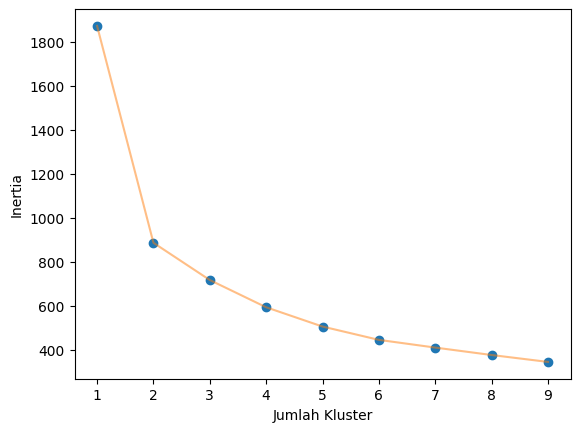

In [10]:
# Mendefinisikan fungsi elbow_plot dengan parameter data dan clusters
def elbow_plot(data, clusters):
    # Membuat daftar kosong untuk menyimpan nilai inertia
    inertia = []

    # Melakukan iterasi pada rentang nilai cluster dari 1 hingga clusters
    for n in range(1, clusters):
        # Membuat model KMeans dengan n kluster, inisialisasi k-means++, dan random state tetap
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )

        # Melatih model pada data input
        algorithm.fit(data)

        # Menambahkan inertia (jumlah kuadrat dalam kluster) ke daftar inertia
        inertia.append(algorithm.inertia_)

    # Membuat plot elbow
    plt.plot(np.arange(1, clusters), inertia, "o")
    plt.plot(np.arange(1, clusters), inertia, "-", alpha=0.5)

    # Menetapkan label untuk sumbu x dan y
    plt.xlabel("Jumlah Kluster")
    plt.ylabel('Inertia')

    # Menampilkan plot
    plt.show()

# Memanggil fungsi elbow_plot dengan data input x_norm dan jumlah kluster diatur menjadi 10
elbow_plot(x_norm, 10)


Pada plot hasil menunjukan dengan penggunaan metode elbow diperoleh nilai
optimal yaitu 3.

### 5. K-Means Clustering

In [11]:
algorithm = KMeans(n_clusters = 3, init="k-means++", random_state=125)
algorithm.fit(x_norm)
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


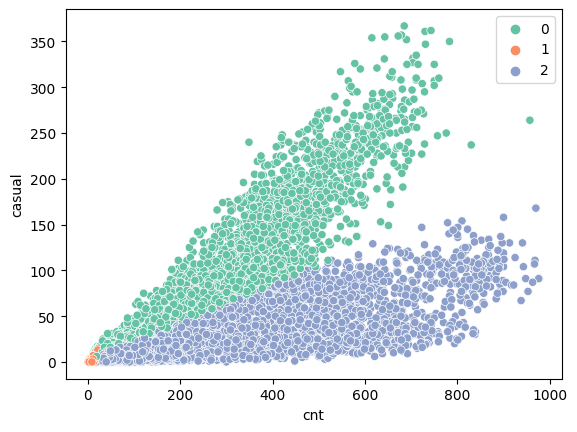

In [12]:
#membuat scatter plot dari data yang telah dikelompokkan
sns.scatterplot(data = x, x = "cnt", y="casual", hue = labels, palette="Set2");


Analisis hasil K-Means : \
"0" : : Dari jumlah tota peminjam sepeda rendah dengan jumlah peminjam sepeda tanpa keanggotaan tetap tinggi\
"1" : Dari jumlah tota peminjam sepeda rendah dengan jumlah peminjam sepeda tanpa keanggotaan tetap rendah \
"2" : Dari jumlah tota peminjam sepeda tinggi dengan jumlah peminjam sepeda tanpa keanggotaan tetap rendah

### 6. Using different features
Selanjutnya akan dilakukan clustering pada fitur yang berbeda dengan menghilangkan atribut "dteday" dan "temp".

In [13]:
#drop kolom "dtedat" dan "temp"
x = df_bike.drop(['dteday', 'temp'],axis=1)
#normalisasi data yang berbeda
x_norm = preprocessing.normalize(x)

In [ ]:
elbow_plot(x_norm,10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Terapkan algoritma KMeans dengan 3 klaster pada set fitur baru yang dinormalisasi
algorithm = KMeans(n_clusters=3, init="k-means++", random_state=125)
algorithm.fit(x_norm)
# Dapatkan label klaster untuk setiap sampel data
labels = algorithm.labels_

In [ ]:
# Buat scatter plot dari data yang telah dikelompokkan menggunakan fitur yang berbeda
sns.scatterplot(data = x, x = "atemp", y = "registered", hue = labels, palette = "Set2")

Analisis hasil  : \
Dilakukan clustering dengan fitur yang berbeda yaitu "atemp" sebagai sumbu x dan "registered" sebagai sumbu y. Hasil cluster didapi sebagai berikut :\
"0" : : Dari suhu perasa tinggi dengan Jumlah peminjaman sepeda dengan keanggotaan tetap rendah hingga rata-rata\
"1" : Jumlah peminjaman sepeda dengan keanggotaan tetap rendah \
"2" : Jumlah peminjaman sepeda dengan keanggotaan tetap dan suhu perasa tinggi

In [ ]:
# Membuat box plot untuk masing-masing klaster terhadap variabel 'atemp'
sns.boxplot(x=labels, y=x['atemp'])

diagram diatas merupakan visualisasi diagram kotak suhu pengeluaran.

## **Flowchart**
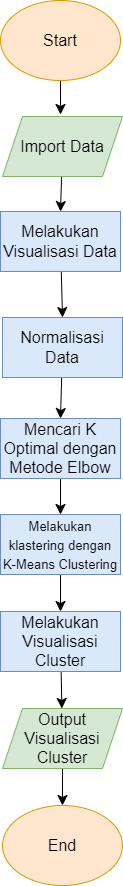

# **Klastering Pada Dataset clinfo.csv**

---



## **Deskripsi Data**
Data ketiga yang saya gunakan adalah dataset clinfo.csv. Data ini terdiri dari beberapa fitur yaitu :
- ID : nomor identifikasi
- LEARNING CENTER : Nama dari sekolah atau lembaga pendidikannya
- BRANCH SCHOOL: cabang-cabang sekolah atau lembaga pendidikan
- TUTOR : jumlah pengajar yang terlibat dalam proses pembelajaran
- HEAD TEACHER : identifikasi jumlah kepala sekolah
- ONLINE : jumlah siswa yang terdaftar online
- OFFLINE : jumlah siswa yang terdaftar luring.



### 1. Data Loading
Hal pertama yang harus kita lakukan adalah muat file clinfo.csv menggunakan pandas dan menjadikan "ID" sebagai indeks.

In [ ]:
import pandas as pd
df_clinfo = pd.read_csv(("/content/clinfo.csv"), encoding='ISO-8859-1', index_col="ID")
df_clinfo.head(3)

Output diatas merupakan tiga data teratas pada data.

### 2. Visualization
Lalu, kita lakukan visualisasi dengan menggunakan scatter plot dari seaborn.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize = (10,5))
sns.scatterplot(
    data=df_clinfo,
    x="ONLINE",
    y="OFFLINE",
    hue="LEARNING CENTER",
    size="TUTOR",
    palette="Set2"
);

Scatter plot diatas menampilkan titik-titik dimana setiap titik mewakii pembelajaran. Scatter plot tersebut menggambarkan hubungan variabel "ONLINE" yaitu  jumlah siswa yang terdaftar online di sumbu X dan "OFFLINE" yaitu  jumlah siswa yang terdaftar offline di sumbu Y. Pada plot juga variabel "LEARNING CENTER" memberikan warna yang berbeda pada titik - titik scatter plot berdasarkan nama embaga atau sekolah. Untuk membedakan ukuran titik-titik scatter plot digunakan variabel "TUTOR"
yaitu jumlah pengajar yang terlibat dalam proses pembelajaran.\
 Dapat dilihat pada plot jumlah siswa yang terdaftar online dan offline tersebar secara merata. Untuk menemukan lebih banyak kluster akan dilakukan menggunakan algoritma clustering selanjutnya.

### 3. Normalizing
Selanjutnya akan dilakukan normalisasi untuk menghilangkan outlier atau anomali apa pun. Misal kita menghapus kolom “BRANCH SCHOOL” dan akan menggunakan kolom lainnya untuk menemukan cluster.

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_clinfo['LEARNING CENTER'] = label_encoder.fit_transform(df_clinfo['LEARNING CENTER'])

X = df_clinfo.drop(["BRANCH SCHOOL"],axis=1)
X_norm = preprocessing.normalize(X)

### 4. Elbow Method
Untuk menemukan kluster, dilakukan pencarian niai K optimal pada K-Means menggunakan metode elbow.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def elbow_plot(data,clusters):
  inertia = []
  for n in range(1, clusters):
    algorithm = KMeans(
        n_clusters = n,
        init = "k-means++",
        random_state=125,
    )
    algorithm.fit(data)
    inertia.append(algorithm.inertia_)
  #plot
  plt.plot(np.arange(1, clusters), inertia, 'o')
  plt.plot(np.arange(1, clusters), inertia, '-', alpha =0.5)
  plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
  plt.show();
elbow_plot(X_norm,10)

Pada plot hasil menunjukan dengan penggunaan metode elbow diperoleh nilai
optimal yaitu 3.

### 5. K-Means Clustering

In [ ]:
algorithm = KMeans(n_clusters = 3, init="k-means++", random_state=125)
algorithm.fit(X_norm)
labels = algorithm.labels_

In [ ]:
sns.scatterplot(data = X, x = "ONLINE", y="OFFLINE", hue = labels, palette="Set2");


Plot diatas merupakan representasi distribusi cluster dua fitur yang diplotkan yaitu "ONLINE" dan "OFFLINE".

### 6. Using different features
Selanjutnya akan dilakukan clustering dengan fitur yang berbeda dengan menghapus kolom "BRANCH SCHOOL".





In [ ]:
X = df_clinfo.drop(["BRANCH SCHOOL"],axis=1)
X_norm = preprocessing.normalize(X)

In [ ]:
elbow_plot(X_norm,10)

In [ ]:
algorithm = KMeans(n_clusters=3,init="k-means++",random_state=125)
algorithm.fit(X_norm)
labels=algorithm.labels_

In [ ]:
sns.scatterplot(data = X, x = 'LEARNING CENTER', y = 'OFFLINE', hue = labels, palette="Set2");

Hasil analisis :\
"0" : Offline tinggi\
"1" : Learning center dan offline tinggi\
"2" : Offline tinggi dengan learning center rendah hingga rata-rata

In [ ]:
sns.boxplot(x = labels, y = X['LEARNING CENTER']);

Diagram diatas merupakan visualisasi data kotak berdasarkan nama sekolah atau lembaga (Learning Center)

## **Flowchart**
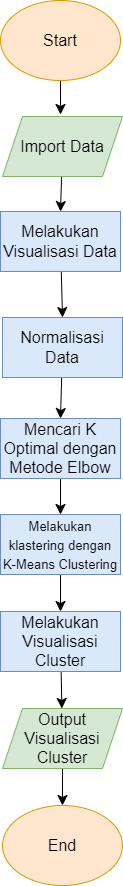